<img src="raw\profile_manoelgadi.png" width=100 height=100 align="right">

Author: Manoel Gadi

Last revision: 19/July/2020

---

Welcome to the GROUP VIDEO starter code.

Your group task is to record a video of 10 - 15 minutes CLEANING DATA and DEVELOPING 2 MODELS using the RBA_KYC_Accounts_ALL_Ids.xlsx dataset. You should use Pandas, Matplotlib and Scikit Learn (Sklearn) libraries only if possible. Your video should include:

* A quick explanation of Pandas, Matplotlib and Sklearn, specially including their histories. (less than a minute)
* A quick Exploratory Data Analysis of the data set used.
* Using the EDA, explain the problems of data quality in this data set.
* Research about data preparation with Python. Propose and implement ways to clean, input missing and prepare the data for modelling. (YOUR VIDEO SHOULD FOCUS IN THIS PART - 70-80% OF THE VIDEO SHOULD BE ABOUT DATA CLEANING AND DATA PREPARATION)
* Then, develop one Regression model using rbaValue as target variable.  Remember to assess the model performance using an appropriate measure for regression. 
* Then, develop one binary Classification model using Risk_Description setting Risk_Description = Low as 0 and else 1 (Medium or High). Remember to assess your model performance using a appropriate measure for classification.

ps. please, don't improve the model, you don't need to make good one, simply do a quick one! This exercise is about explaining, in a video lecture, how to prepare the data for modelling , not about making a good model .

ps. You can apply any of the steps in the model development seing in the last class, but be coincious of time it may take to do it all, so avoid overcomplicating things.

Please find below couple videos from previous years (different data set and different objective) and from which you'll also learn some Python ideas:

* 2018 MBD01 Group E Variable Transformation - https://www.youtube.com/watch?v=j_0HQ2UF_L0
* 2019 - Risk & Fraud Analytics - Scikit Learn & Lending Club - Group C - https://www.youtube.com/watch?v=oTmHMXsksM8

---

### Importing the database: RBA_KYC_Accounts_ALL_Ids.xlsx

In [1]:
#General usage
import math
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modeling
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# https://dateutil.readthedocs.io/en/stable/relativedelta.html
from datetime import datetime
from dateutil.relativedelta import relativedelta, MO

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# df = pd.read_excel('raw/RBA_KYC_Accounts_ALL_Ids.xlsx')
df_metadata_countries = pd.read_excel('raw/RBA Metadata.xlsx', sheet_name='COUNTRIES', keep_default_na=False)

# For speed, we store the Excel file in a Pickle
# https://stackoverflow.com/a/17098736/3780957
# df.to_pickle('storage\RBA_KYC_Accounts_ALL_Ids.pkl')

In [3]:
df = pd.read_pickle('storage/RBA_KYC_Accounts_ALL_Ids.pkl')

Merge data frames to have the complete country name

In [4]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge
df_metadata_countries['CountryName'] = df_metadata_countries['DescriptionENG']
df1 = df
for x in ['residentCountry', 'nationalityOriginal', 'extraNationality']:
    country_x = 'CountryName_{}'.format(x)
    df_metadata_countries[country_x] = df_metadata_countries['DescriptionENG']
    df1 = df1.merge(df_metadata_countries[['value', country_x]], left_on=x, right_on='value', how='left')
    df1.drop('value', axis=1, inplace=True)

In [5]:
df['Risk_Description'] = df['rba_grade_desc']
df.drop(['rba_grade_desc'], axis = 1, inplace = True) 

## Checking some quick statistics

In [6]:
df.describe()

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,birthCountry,profession,companyType,lastUpdate,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868.000000,224868.000000,220153.000000,0.0,79748.000000,114574.000000,0.0,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,0.0,224868.000000
mean,1.0,448.451323,4.394503e+16,1.114418,1.021221,41.310575,NaN,18.309487,49.857577,NaN,...,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,17.624194
std,0.0,228.193308,2.349321e+16,0.318319,0.144122,16.000536,NaN,6.586481,6.736115,NaN,...,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,8.368345
min,1.0,201.000000,2.020028e+09,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,1.000000,1.000000,31.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,1.000000,1.000000,41.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,1.000000,1.000000,52.000000,NaN,21.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,21.330000
max,1.0,805.000000,8.052929e+16,2.000000,2.000000,119.000000,NaN,39.000000,100.000000,NaN,...,1267.000000,0.000000e+00,3292.000000,5.867291e+05,78.000000,8.394000e+06,2858.000000,9.942530e+06,NaN,100.000000


## Creating the variable creationDate_indays

In [7]:
df['creationDate_indays'] = df['creationDate'].astype('datetime64[ns]').max()-df['creationDate'].astype('datetime64[ns]') 
df['creationDate_indays'].head()

0   1295 days
1   1860 days
2   1860 days
3   1860 days
4   1860 days
Name: creationDate_indays, dtype: timedelta64[ns]

## Creating the variable date of birth

In [8]:
def f(end):
    global max_date
    try:
        r = relativedelta(max_date, end) 
        return(r.years)
    except:
        return(0)
#    r = relativedelta(pd.to_datetime('now'), end) 
#    return '{} years {} days'.format(r.years, r.days)

In [9]:
max_date = df['dateOfBirth'].astype('datetime64[ns]').max()
df['age'] = df['dateOfBirth'].astype('datetime64[ns]').apply(f)
df['age'].head()

0     0
1    29
2    29
3    29
4    29
Name: age, dtype: int64

## Checking for percentage (%) of missing values

In [10]:
100*df.isnull().sum()/df.isnull().count()

org_code                        0.000000
branchCode                      0.000000
customerId                      0.000000
fullaccount                     0.000000
customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265044
nationalityOriginal             1.529342
extraNationality               99.202643
dateOfBirth                     2.096786
age_in_year                     2.096786
birthCountry                  100.000000
birthPlace                      9.713254
profession                     64.535639
companyType                    49.048331
giinCode                       99.994664
lastUpdate                    100.000000
status                          0.000000
ledgerCode                      0.000000
accountCurrency                 0.000000
jointAccount                    0.000000
IsBlackListed                   0.000000
CUS_CLASS       

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

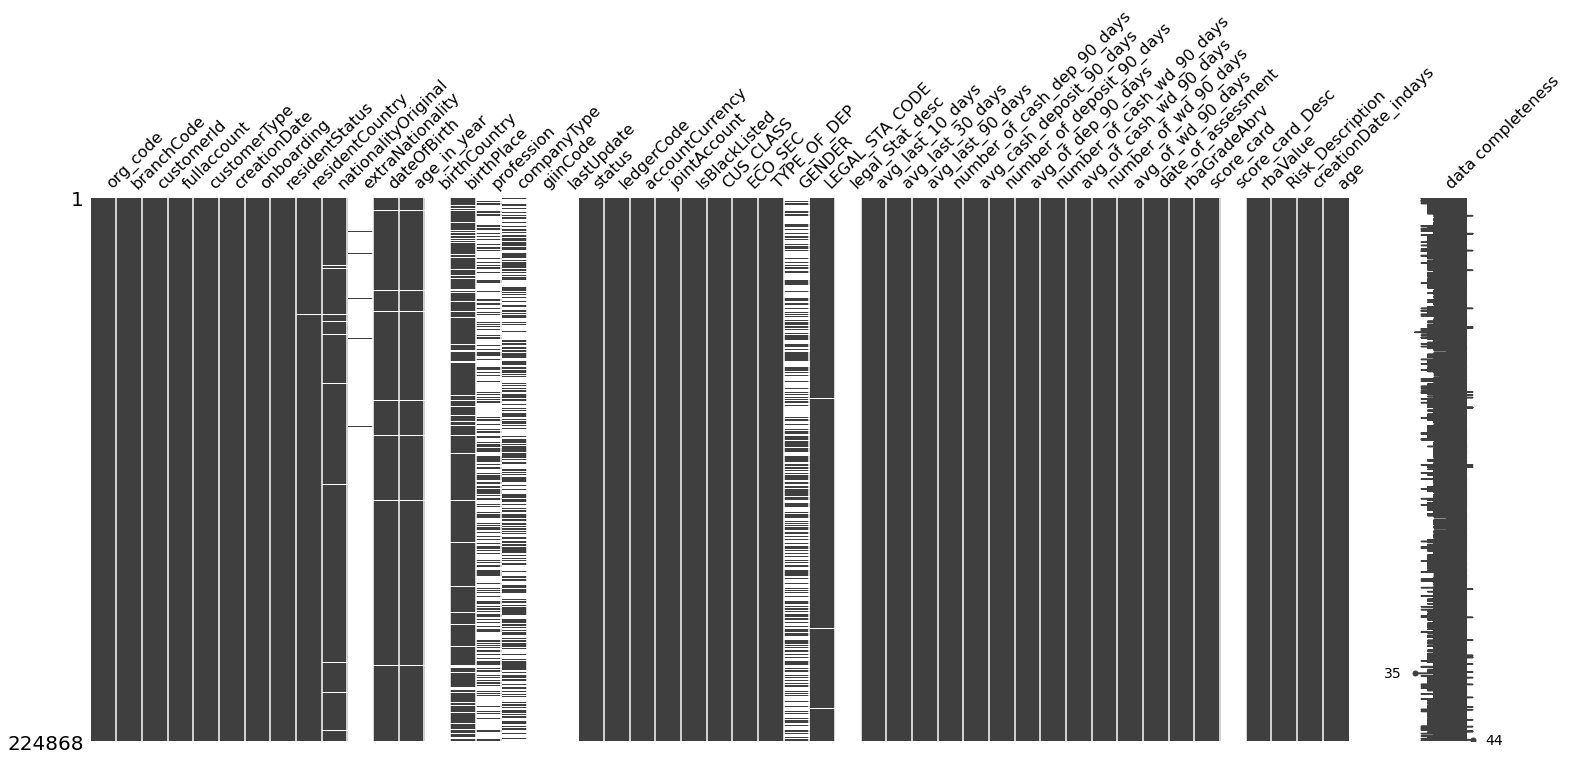

In [11]:
# https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/notebooks/2-Aquastat-EDA/2-Aquastat-Missing-Data.ipynb
msno.matrix(df, labels=True)
plt

## Making some histograms

In [12]:
# %matplotlib inline
# import matplotlib.pylab as plt
# attribute_columns = list(df.columns)
# if True:
#     fontsize = 10
#     fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
#                                        xlabelsize=fontsize,
#                                        ylabelsize=fontsize)
#     for x in fig.ravel():
#         x.title.set_size(fontsize)
# else:
#     nrows = (len(attribute_columns)+1) // 2
#     plt.figure(figsize=(12,25))
#     for i in range(len(attribute_columns)):
#         name = attribute_columns[i]
#         plt.subplot(nrows,2,i+1)
#         data[name].hist()
#         plt.title(name, fontsize=14)
    
# plt.show()

### Now, is your group turn: 
...

---

# Introduction

A quick explanation of Pandas, Matplotlib and Sklearn, specially including their histories. (less than a minute)
https://medium.com/personal-project/numpy-pandas-and-scikit-learn-explained-e7336baecedc

## Pandas
https://en.wikipedia.org/wiki/Pandas_(software)#History
Developer Wes McKinney started working on pandas in 2008 while at AQR Capital Management out of the need for a high performance, flexible tool to perform quantitative analysis on financial data. Before leaving AQR he was able to convince management to allow him to open source the library.
Another AQR employee, Chang She, joined the effort in 2012 as the second major contributor to the library.
In 2015, pandas signed on as a fiscally sponsored project of NumFOCUS, a 501(c)(3) nonprofit charity in the United States.[10]

Intro: https://www.youtube.com/watch?v=XDAnFZqJDvI

## Matplotlib
https://en.wikipedia.org/wiki/Matplotlib
Matplotlib was originally written by John D. Hunter, since then it has an active development community,[4] and is distributed under a BSD-style license. Michael Droettboom was nominated as matplotlib's lead developer shortly before John Hunter's death in August 2012,[5] and further joined by Thomas Caswell.[6][7]


## Sklearn
https://en.wikipedia.org/wiki/Scikit-learn
The scikit-learn project started as scikits.learn, a Google Summer of Code project by David Cournapeau. Its name stems from the notion that it is a "SciKit" (SciPy Toolkit), a separately-developed and distributed third-party extension to SciPy.[4] The original codebase was later rewritten by other developers. In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort and Vincent Michel, all from the French Institute for Research in Computer Science and Automation in Rocquencourt, France, took leadership of the project and made the first public release on February the 1st 2010.[5] Of the various scikits, scikit-learn as well as scikit-image were described as "well-maintained and popular" in November 2012.[6] Scikit-learn is one of the most popular machine learning libraries on GitHub.[7].

Intro: https://www.youtube.com/watch?v=rvVkVsG49uU

# EDA

In [13]:
# Datetime conversion

df['creationDate'] = df['creationDate'].astype('datetime64[ns]')
df['dateOfBirth'] = df['dateOfBirth'].astype('datetime64[ns]')
df['date_of_assessment'] = df['date_of_assessment'].astype('datetime64[ns]')

## Description per type

In [14]:
df.describe(include='object').T

,count,unique,top,freq
fullaccount,224868,220434,020902507770010010000,26
onboarding,224868,2,N,219791
residentCountry,224272,62,JO,219253
nationalityOriginal,221429,67,JO,213141
extraNationality,1793,35,US,1028
birthPlace,203026,1000,????,76312
giinCode,12,1,ZLVK2E.99999.SL.400,12
status,224868,1,Active,224868
accountCurrency,224868,20,JOD,214657
rbaGradeAbrv,224868,3,L,159680


In [15]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
org_code,224868,1,0,1,1,1,1,1
branchCode,224868,448.451,228.193,201,208,401,701,805
customerId,224868,4.3945e+16,2.34932e+16,2.02003e+09,2.07021e+16,4.0112e+16,7.01241e+16,8.05293e+16
customerType,224868,1.11442,0.318319,1,1,1,1,2
residentStatus,224868,1.02122,0.144122,1,1,1,1,2
age_in_year,220153,41.3106,16.0005,1,31,41,52,119
birthCountry,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profession,79748,18.3095,6.58648,1,20,20,21,39
companyType,114574,49.8576,6.73611,1,51,51,51,100
lastUpdate,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.describe(include=np.datetime64).T

,count,unique,top,freq,first,last
creationDate,224868,7041,2013-11-20,1079,1978-09-17,2018-10-21
dateOfBirth,220153,21457,1992-07-22,1035,1900-06-01,2018-10-15
date_of_assessment,224868,1,2019-01-24,224868,2019-01-24,2019-01-24


In [17]:
cat_columns = df.select_dtypes(include=['object'])
for col in cat_columns:
    print("VARIABLE =", col)
    print(df[col].value_counts())
    print('\n'*2)

VARIABLE = fullaccount
020902507770010010000    26
020301298000012969000    23
020301298000012957000    23
020301298000011930001    23
020301298000011930000    23
                         ..
020700901870020055000     1
020601801460011355003     1
020200666110011344172     1
080126070640010030000     1
020802300160010010000     1
Name: fullaccount, Length: 220434, dtype: int64



VARIABLE = onboarding
N    219791
Y      5077
Name: onboarding, dtype: int64



VARIABLE = residentCountry
JO    219253
OM       985
IQ       981
SA       657
US       358
       ...  
BG         2
SO         1
NG         1
AF         1
LR         1
Name: residentCountry, Length: 62, dtype: int64



VARIABLE = nationalityOriginal
JO    213141
IQ      3206
EG      1349
SY      1215
LY       433
       ...  
SO         1
SG         1
KP         1
IO         1
LR         1
Name: nationalityOriginal, Length: 67, dtype: int64



VARIABLE = extraNationality
US    1028
XK     435
CA      45
GB      42
JO      34
CO   

Correct the missings varints in the 'birthPlace'

In [18]:
out = []
for val in df['birthPlace']:
    try:
        if val.find('?')>=0 or val.strip()=='0':
            out.append('-')
        else:
            out.append(val.strip().upper())
    except:
        out.append(val)

# pd.Series(out).value_counts()
df['birthPlace'] = out

In [19]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[num_columns].describe().T

# for col in num_columns:
#     print("VARIABLE = ", col)
#     print(df[col].describe())
#     print('\n'*2)

,count,mean,std,min,25%,50%,75%,max
org_code,224868.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
branchCode,224868.0,4.484513e+02,2.281933e+02,2.010000e+02,2.080000e+02,4.010000e+02,7.010000e+02,8.050000e+02
customerId,224868.0,4.394503e+16,2.349321e+16,2.020028e+09,2.070207e+16,4.011205e+16,7.012410e+16,8.052929e+16
customerType,224868.0,1.114418e+00,3.183193e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
residentStatus,224868.0,1.021221e+00,1.441218e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
age_in_year,220153.0,4.131057e+01,1.600054e+01,1.000000e+00,3.100000e+01,4.100000e+01,5.200000e+01,1.190000e+02
birthCountry,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profession,79748.0,1.830949e+01,6.586481e+00,1.000000e+00,2.000000e+01,2.000000e+01,2.100000e+01,3.900000e+01
companyType,114574.0,4.985758e+01,6.736115e+00,1.000000e+00,5.100000e+01,5.100000e+01,5.100000e+01,1.000000e+02
lastUpdate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove fully NA columns

In [20]:
# df.info()

In [21]:
# Drop columns where all the values are missing or null
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df.dropna(axis='columns', how='all', inplace=True)

In [22]:
# df.info()
# 100*df.isnull().sum()/df.isnull().count()

## Imputation and Scaling

There are [several ways of imputing missing values](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation). I'd like to use a multivariate approach, which is much better than univariate methods (imputing by the mean, etc.). To do so, I will use the methods available in `scikit-learn` library ([here](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)).

In [23]:
df.select_dtypes(include=np.number)

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,profession,companyType,ledgerCode,jointAccount,...,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaValue,creationDate_indays,age
0,1,201,20100400550000072,2,1,NaN,NaN,35.0,5817,0,...,0.0,0,0.0,0,0.0,0,0.0,13.20,1295 days,0
1,1,202,20200207860000638,1,1,30.0,27.0,NaN,1330,0,...,0.0,0,0.0,0,0.0,0,0.0,16.93,1860 days,29
2,1,202,20200207860000638,1,1,30.0,27.0,NaN,1389,0,...,0.0,0,0.0,0,0.0,0,0.0,16.93,1860 days,29
3,1,202,20200207860000638,1,1,30.0,27.0,NaN,60,0,...,-550.0,4,-550.0,1,50.0,1,50.0,16.93,1860 days,29
4,1,202,20200207860000638,1,1,30.0,27.0,NaN,10,0,...,-540.0,4,-540.0,1,56.0,1,56.0,16.93,1860 days,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224863,1,404,40400811920003507,1,1,66.0,NaN,NaN,20,0,...,0.0,0,0.0,0,0.0,0,0.0,16.53,364 days,65
224864,1,202,20200577640010547,2,1,13.0,NaN,35.0,5300,0,...,0.0,0,0.0,0,0.0,0,0.0,57.60,5199 days,12
224865,1,502,50220271300005255,1,1,41.0,NaN,51.0,2980,0,...,0.0,0,0.0,0,0.0,0,0.0,14.53,6633 days,40
224866,1,704,70424500690004664,1,1,70.0,NaN,NaN,1396,0,...,0.0,0,0.0,0,0.0,0,0.0,24.53,3931 days,69


https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [24]:
num_imputer = IterativeImputer(max_iter=10, random_state=0)
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_feats = num_imputer.fit_transform(df[num_columns])
num_feats = pd.DataFrame(data=num_feats, columns=num_columns)

To perform imputaton on categorical variables, I decided to use a method provided by the library `sklearn_pandas` that implements a `CategoricalImputer`.

https://github.com/scikit-learn-contrib/sklearn-pandas

Since the scikit-learn Imputer transformer currently only works with numbers, sklearn-pandas provides an equivalent helper transformer that works with strings, substituting null values with the most frequent value in that column. Alternatively, you can specify a fixed value to use.

Alternatives  
https://stackoverflow.com/questions/42846345/sklearn-categorical-imputer  
https://github.com/scikit-learn-contrib/sklearn-pandas  
https://scikit-learn.org/stable/modules/impute.html

In [25]:
# Commented to speed up debuging

# cat_imputer = SimpleImputer(strategy="most_frequent")
# cat_columns = df.select_dtypes(include=['object', 'datetime64']).columns
# cat_feats = cat_imputer.fit_transform(df[cat_columns])
# cat_feats = pd.DataFrame(data=cat_feats, columns=cat_columns)


Feature engineering for the dates

In [26]:
df_time = pd.DataFrame()
for col in df.select_dtypes(include=['datetime64']):
    df_time['{}_year'.format(col)] = df[col].dt.year
    df_time['{}_month'.format(col)] = df[col].dt.month
    df_time['{}_day'.format(col)] = df[col].dt.day
    df_time['{}_dayofyear'.format(col)] = df[col].dt.dayofyear

Finally, the result of imputing both: numerical and categorical, is now merged together in a single Dataset (or you can also use a dataframe, if you prefer).

In [27]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# date_columns = df.select_dtypes(include=['datetime64']).columns
df = pd.concat([cat_feats, num_feats, df_time], axis=1, sort=False)

# Plots

Text(0.5, 1.0, 'Risk by age')

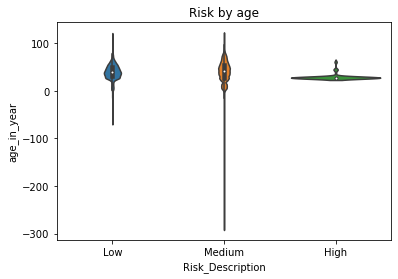

In [28]:
# https://campus.ie.edu/webapps/discussionboard/do/message?action=list_messages&course_id=_114341620_1&nav=discussion_board_entry&conf_id=_259504_1&forum_id=_118684_1&message_id=_4841402_1
sns.violinplot(x='Risk_Description', y='age_in_year', data=df).set_title('Risk by age')

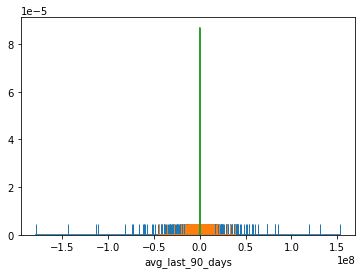

In [29]:
# https://stackoverflow.com/questions/46045750/python-distplot-with-multiple-distributions
sns.distplot(df['avg_last_10_days'], hist=False, rug=True)
sns.distplot(df['avg_last_30_days'], hist=False, rug=True)
sns.distplot(df['avg_last_90_days'], hist=False, rug=True)
plt.show()

Top values
https://stackoverflow.com/questions/58272872/pandas-top-n-values-in-each-group
https://stackoverflow.com/questions/48909110/python-pandas-mean-and-sum-groupby-on-different-columns-at-the-same-time

Using flags
https://github.com/google/region-flags
https://github.com/hjnilsson/country-flags
https://pypi.org/project/emoji-country-flag/
https://stackoverflow.com/questions/44246650/automating-bar-charts-plotting-to-show-country-flags-as-ticklabels
https://stackoverflow.com/questions/19835746/how-to-group-remaining-results-beyond-top-n-into-others-with-pandas
https://matplotlib.org/3.1.1/tutorials/introductory/images.html

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def get_flag(name):
    # path = "storage/region-flags-gh-pages-png/40x40/{}.png".format(name.title())
    try:
        path = "https://raw.githubusercontent.com/google/region-flags/gh-pages/png/{}.png".format(name)
        im = plt.imread(path)
        img = OffsetImage(im, zoom=0.01)
    except:
        path = "storage/region-flags-gh-pages-png/40x40/{}.png".format(name)
        im = plt.imread(path)
        img = OffsetImage(im, zoom=0.40)
        print('From local drive: {}'.format(name))
    return img

def offset_image(coord, name, ax):
    im = get_flag(name)
    # im = OffsetImage(img, zoom=0.40)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False, xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)

def plot_bar_countries(df, countries, valuesA, nlargest=10):
    bottom_countries = df.groupby(countries).mean().sort_values(by=valuesA, ascending=False)[nlargest:].index.values
    df2 = df.replace(bottom_countries, 'Others').groupby(countries).mean().sort_values(by=valuesA, ascending=False)

    fig, ax = plt.subplots()

    ax.bar(range(len(df2.index.values)), df2[valuesA], width=0.5, align="center")
    ax.set_xticks(range(len(df2.index.values)))
    ax.set_xticklabels(df2.index.values)
    ax.tick_params(axis='x', which='major', pad=26)

    for i, c in enumerate(df2.index.values):
        offset_image(i, c, ax)

    plt.show()

From local drive: Others


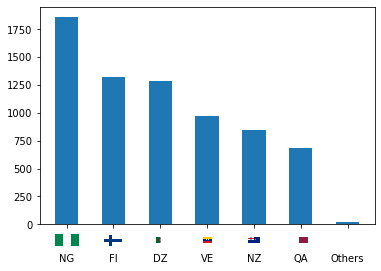

In [62]:
plot_bar_countries(df, 'residentCountry', 'avg_last_90_days', 6)

# Scale

Scale all the numeric values, at this point.

In [ ]:
# https://stackoverflow.com/a/36475297/3780957

num_columns = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

Now, my dataset is ready to be analyzed. Lots of categorical and numerical variables.

In [ ]:
df.describe()

In [ ]:
100*df.isnull().sum()/df.isnull().count()

In [ ]:
# Drop rows with NA

df.dropna(axis='rows', how='any', inplace=True)

# Regression model

Develop one Regression model using rbaValue as target variable. Remember to assess the model performance using an appropriate measure for regression.

In [ ]:
y = df['rbaValue']
X = df.drop('rbaValue', axis=1)

In [ ]:
X = OneHotEncoder(drop='first').fit_transform(X)

In [ ]:
# https://github.com/renero/class_notebooks/blob/master/Linear%20regression.ipynb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('Intercept:', lm.intercept_)
print('Coefficients:', lm.coef_)
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Variance score (R2): {:.2f}'.format(r2_score(y_test, y_pred)))

# Classification model

Develop one binary Classification model using Risk_Description setting Risk_Description = Low as 0 and else 1 (Medium or High). Remember to assess your model performance using a appropriate measure for classification.

In [ ]:
# Merge the categories 'Medium' and 'High'
y = df['Risk_Description']
y = [0 if x=='Low' else 1 for x in y]
# pd.Series(y).value_counts()

X = df.drop('Risk_Description', axis=1)

In [ ]:
X = OneHotEncoder(drop='first').fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression().fit(X_train, y_train)
y_hat = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
F1 = f1_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
MCC = matthews_corrcoef(y_test, y_hat)

print('Accuracy:', accuracy)
print('F1:', F1)
print('Recall:', recall)
print('MCC:', MCC)

In [ ]:
1+1